In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hackath/synthetic_fraud_detection_data (1) (1).csv')

In [ ]:
df.head()

,Transaction Amount,Transaction Time,Transaction Type,Merchant Category,Merchant Location,Average Transaction Amount,Transaction Frequency,Time Since Last Transaction,Transaction Velocity,Historical Transaction Patterns,...,Keystroke Dynamics,Mouse Movement,Touchscreen Gestures,Anomaly Scores,Categorical Aggregates,Temporal Aggregates,User Age,Account Tenure,Credit Score,Fraudulent
0,249.29,2024-03-30 21:59,Online,Groceries,Capewtown,153.33,20,25,Low,Infrequent,...,Low,Moderate,Moderate,0.89,High,Low,23,3,689,1
1,168.63,2024-02-29 14:35,Online,Electronics,Pretoria,35.14,10,22,Low,Frequent,...,Moderate,Low,High,0.74,Low,High,51,6,769,1
2,260.53,2024-07-28 12:41,In-store,Travel,Port Elizabeth,125.75,2,30,Medium,Frequent,...,High,Low,Low,0.03,Low,High,67,9,626,0
3,54.73,2024-05-08 22:22,Online,Electronics,Pretoria,239.64,24,24,High,Infrequent,...,Moderate,Moderate,Low,0.77,Medium,Low,28,8,764,1
4,229.42,2024-05-09 01:31,Online,Groceries,Durban,183.36,2,14,High,Frequent,...,High,Low,High,0.90,Low,Low,47,6,612,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Transaction Amount                    4000 non-null   float64
 1   Transaction Time                      4000 non-null   object 
 2   Transaction Type                      4000 non-null   object 
 3   Merchant Category                     4000 non-null   object 
 4   Merchant Location                     4000 non-null   object 
 5   Average Transaction Amount            4000 non-null   float64
 6   Transaction Frequency                 4000 non-null   int64  
 7   Time Since Last Transaction           4000 non-null   int64  
 8   Transaction Velocity                  4000 non-null   object 
 9   Historical Transaction Patterns       4000 non-null   object 
 10  Device ID                             4000 non-null   object 
 11  Browser and OS   

In [ ]:
df.describe()

,Transaction Amount,Average Transaction Amount,Transaction Frequency,Time Since Last Transaction,Distance from Last Transaction,Anomaly Scores,User Age,Account Tenure,Credit Score,Fraudulent
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,158.595102,158.412323,15.532250,15.574250,24.946025,0.502223,44.216000,5.533000,699.020000,0.496750
std,80.627578,81.520391,8.647321,8.604853,14.373632,0.289178,15.268043,2.874191,58.707459,0.500052
min,20.150000,20.090000,1.000000,1.000000,0.000000,0.000000,18.000000,1.000000,600.000000,0.000000
25%,88.112500,85.682500,8.000000,8.000000,12.675000,0.260000,31.000000,3.000000,648.000000,0.000000
50%,155.495000,157.305000,16.000000,16.000000,24.800000,0.490000,45.000000,6.000000,700.000000,0.000000
75%,228.682500,228.570000,23.000000,23.000000,37.400000,0.760000,58.000000,8.000000,749.000000,1.000000
max,299.940000,299.930000,30.000000,30.000000,50.000000,1.000000,70.000000,10.000000,800.000000,1.000000


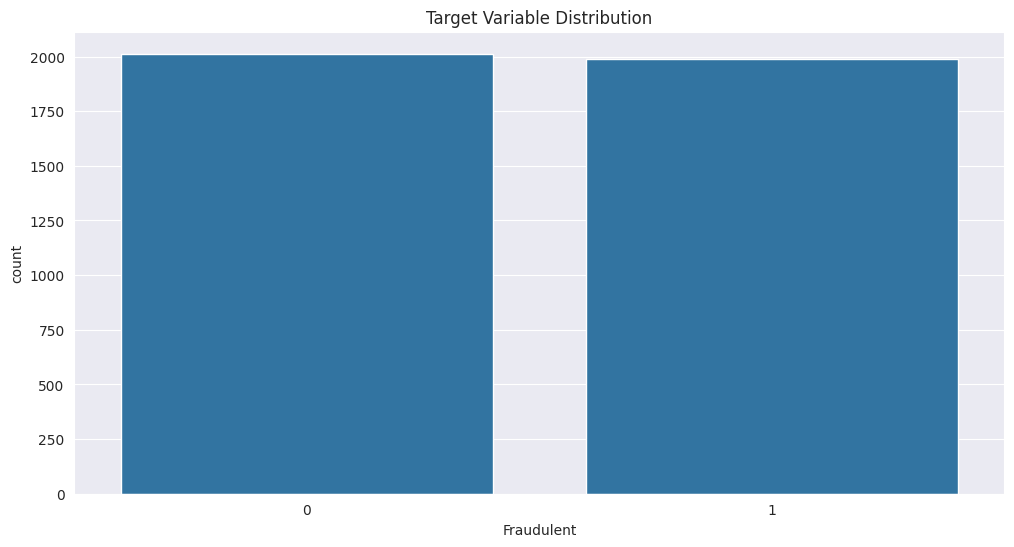

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Fraudulent', data = df)
plt.title('Target Variable Distribution')
plt.show()

In [ ]:
df.shape

(4000, 31)

In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Transaction Time'] = le.fit_transform(df['Transaction Time'])
df['Transaction Type'] = le.fit_transform(df['Transaction Type'])
df['Merchant Category'] = le.fit_transform(df['Merchant Category'])
df['Merchant Location'] = le.fit_transform(df['Merchant Location'])


df['Transaction Velocity'] = le.fit_transform(df['Transaction Velocity'])
df['Historical Transaction Patterns'] = le.fit_transform(df['Historical Transaction Patterns'])
df['Device ID'] = le.fit_transform(df['Device ID'])
df['Browser and OS'] = le.fit_transform(df['Browser and OS'])

df['IP Address'] = le.fit_transform(df['IP Address'])
df['Channel'] = le.fit_transform(df['Channel'])
df['Billing Address vs. Shipping Address'] = le.fit_transform(df['Billing Address vs. Shipping Address'])
df['Country'] = le.fit_transform(df['Country'])

df['Region'] = le.fit_transform(df['Region'])
df['Blacklisted Merchants or IPs'] = le.fit_transform(df['Blacklisted Merchants or IPs'])
df['Real-time Threat Intelligence'] = le.fit_transform(df['Real-time Threat Intelligence'])
df['Social Media or Public Data'] = le.fit_transform(df['Social Media or Public Data'])
df['Keystroke Dynamics'] = le.fit_transform(df['Keystroke Dynamics'])
df['Mouse Movement'] = le.fit_transform(df['Mouse Movement'])
df['Touchscreen Gestures'] = le.fit_transform(df['Touchscreen Gestures'])
df['Country'] = le.fit_transform(df['Country'])
df['Categorical Aggregates'] = le.fit_transform(df['Categorical Aggregates'])
df['Temporal Aggregates'] = le.fit_transform(df['Temporal Aggregates'])

In [ ]:
df.head()

,Transaction Amount,Transaction Time,Transaction Type,Merchant Category,Merchant Location,Average Transaction Amount,Transaction Frequency,Time Since Last Transaction,Transaction Velocity,Historical Transaction Patterns,...,Keystroke Dynamics,Mouse Movement,Touchscreen Gestures,Anomaly Scores,Categorical Aggregates,Temporal Aggregates,User Age,Account Tenure,Credit Score,Fraudulent
0,249.29,1665,1,3,0,153.33,20,25,1,1,...,1,2,2,0.89,0,1,23,3,689,1
1,168.63,1057,1,2,4,35.14,10,22,1,0,...,2,1,0,0.74,1,0,51,6,769,1
2,260.53,3873,0,4,3,125.75,2,30,2,0,...,0,1,1,0.03,1,0,67,9,626,0
3,54.73,2340,1,2,4,239.64,24,24,0,1,...,2,2,1,0.77,2,1,28,8,764,1
4,229.42,2344,1,3,1,183.36,2,14,0,0,...,0,1,0,0.90,1,1,47,6,612,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Transaction Amount                    4000 non-null   float64
 1   Transaction Time                      4000 non-null   int64  
 2   Transaction Type                      4000 non-null   int64  
 3   Merchant Category                     4000 non-null   int64  
 4   Merchant Location                     4000 non-null   int64  
 5   Average Transaction Amount            4000 non-null   float64
 6   Transaction Frequency                 4000 non-null   int64  
 7   Time Since Last Transaction           4000 non-null   int64  
 8   Transaction Velocity                  4000 non-null   int64  
 9   Historical Transaction Patterns       4000 non-null   int64  
 10  Device ID                             4000 non-null   int64  
 11  Browser and OS   

In [ ]:
df.columns

Index(['Transaction Amount', 'Transaction Time', 'Transaction Type',
       'Merchant Category', 'Merchant Location', 'Average Transaction Amount',
       'Transaction Frequency', 'Time Since Last Transaction',
       'Transaction Velocity', 'Historical Transaction Patterns', 'Device ID',
       'Browser and OS', 'IP Address', 'Channel',
       'Billing Address vs. Shipping Address',
       'Distance from Last Transaction', 'Country', 'Region',
       'Blacklisted Merchants or IPs', 'Real-time Threat Intelligence',
       'Social Media or Public Data', 'Keystroke Dynamics', 'Mouse Movement',
       'Touchscreen Gestures', 'Anomaly Scores', 'Categorical Aggregates',
       'Temporal Aggregates', 'User Age', 'Account Tenure', 'Credit Score',
       'Fraudulent'],
      dtype='object')

In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Fraudulent')

In [ ]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df.head()

,Transaction Amount,Transaction Time,Transaction Type,Merchant Category,Merchant Location,Average Transaction Amount,Transaction Frequency,Time Since Last Transaction,Transaction Velocity,Historical Transaction Patterns,...,Keystroke Dynamics,Mouse Movement,Touchscreen Gestures,Anomaly Scores,Categorical Aggregates,Temporal Aggregates,User Age,Account Tenure,Credit Score,Fraudulent
0,1.125003,-0.276936,0.9995,0.703201,-1.429122,-0.062352,0.516728,1.095536,0.018114,0.995012,...,-0.016464,1.219467,1.244804,1.341130,-1.232133,0.008212,-1.389743,-0.881402,-0.170698,1
1,0.124475,-0.807918,0.9995,-0.000528,1.401173,-1.512355,-0.639845,0.746852,0.018114,-1.005013,...,1.203122,0.003647,-1.208616,0.822355,-0.003073,-1.208315,0.444382,0.162501,1.192161,1
2,1.264426,1.651366,-1.0005,1.406929,0.693599,-0.400715,-1.565102,1.676676,1.246211,-1.005013,...,-1.236051,0.003647,0.018094,-1.633184,-0.003073,-1.208315,1.492454,1.206403,-1.243950,0
3,-1.288369,0.312559,0.9995,-0.000528,1.401173,0.996534,0.979356,0.979308,-1.209982,0.995012,...,1.203122,1.219467,0.018094,0.926110,1.225987,0.008212,-1.062220,0.858436,1.106982,1
4,0.878530,0.316052,0.9995,0.703201,-0.721549,0.306068,-1.565102,-0.182972,-1.209982,-1.005013,...,-1.236051,0.003647,-1.208616,1.375715,-0.003073,0.008212,0.182364,0.162501,-1.482450,1


In [ ]:
interaction_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features_df = interaction_features.fit_transform(df.drop(columns=['Fraudulent']))
interaction_features_df = pd.DataFrame(interaction_features_df, columns=interaction_features.get_feature_names_out(df.drop(columns=['Fraudulent']).columns))

In [ ]:
interaction_features_df

,Transaction Amount,Transaction Time,Transaction Type,Merchant Category,Merchant Location,Average Transaction Amount,Transaction Frequency,Time Since Last Transaction,Transaction Velocity,Historical Transaction Patterns,...,Categorical Aggregates Temporal Aggregates,Categorical Aggregates User Age,Categorical Aggregates Account Tenure,Categorical Aggregates Credit Score,Temporal Aggregates User Age,Temporal Aggregates Account Tenure,Temporal Aggregates Credit Score,User Age Account Tenure,User Age Credit Score,Account Tenure Credit Score
0,1.125003,-0.276936,0.9995,0.703201,-1.429122,-0.062352,0.516728,1.095536,0.018114,0.995012,...,-0.010118,1.712347,1.086004,0.210323,-0.011412,-0.007238,-0.001402,1.224921,0.237226,0.150454
1,0.124475,-0.807918,0.9995,-0.000528,1.401173,-1.512355,-0.639845,0.746852,0.018114,-1.005013,...,0.003713,-0.001365,-0.000499,-0.003663,-0.536954,-0.196352,-1.440506,0.072212,0.529775,0.193727
2,1.264426,1.651366,-1.0005,1.406929,0.693599,-0.400715,-1.565102,1.676676,1.246211,-1.005013,...,0.003713,-0.004586,-0.003707,0.003822,-1.803354,-1.457715,1.503083,1.800501,-1.856538,-1.500705
3,-1.288369,0.312559,0.9995,-0.000528,1.401173,0.996534,0.979356,0.979308,-1.209982,0.995012,...,0.010067,-1.302269,1.052431,1.357146,-0.008722,0.007049,0.009090,-0.911848,-1.175859,0.950273
4,0.878530,0.316052,0.9995,0.703201,-0.721549,0.306068,-1.565102,-0.182972,-1.209982,-1.005013,...,-0.000025,-0.000560,-0.000499,0.004555,0.001497,0.001334,-0.012173,0.029634,-0.270346,-0.240899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1.004560,0.797254,-1.0005,-1.407984,-0.013975,0.264969,1.673300,-0.182972,0.018114,0.995012,...,0.010067,1.990345,0.199224,-1.441524,0.013331,0.001334,-0.009655,0.263814,-1.908879,-0.191070
3996,-0.948989,-0.222790,-1.0005,1.406929,-1.429122,0.137255,-0.524187,1.676676,-1.209982,0.995012,...,-1.509040,-1.354640,1.943488,-0.461367,1.346510,-1.931824,0.458598,-1.734166,0.411676,-0.590627
3997,-1.569698,-0.913590,-1.0005,-0.000528,-0.721549,-0.339618,-1.218131,-0.182972,0.018114,-1.005013,...,-0.003763,-0.000158,0.002708,-0.001779,0.062897,-1.079486,0.708970,-0.045265,0.029728,-0.510221
3998,-1.676126,-0.016685,-1.0005,-1.407984,0.693599,-1.554926,-1.333788,0.863080,-1.209982,-1.005013,...,0.003713,-0.002171,0.002708,-0.002616,-0.853554,1.065011,-1.028815,-0.622622,0.601462,-0.750466


In [ ]:
#Concatenate interaction features with original features
enhanced_df = pd.concat([df.reset_index(drop=True), interaction_features_df.reset_index(drop=True)], axis=1)

In [ ]:
enhanced_df

,Transaction Amount,Transaction Time,Transaction Type,Merchant Category,Merchant Location,Average Transaction Amount,Transaction Frequency,Time Since Last Transaction,Transaction Velocity,Historical Transaction Patterns,...,Categorical Aggregates Temporal Aggregates,Categorical Aggregates User Age,Categorical Aggregates Account Tenure,Categorical Aggregates Credit Score,Temporal Aggregates User Age,Temporal Aggregates Account Tenure,Temporal Aggregates Credit Score,User Age Account Tenure,User Age Credit Score,Account Tenure Credit Score
0,1.125003,-0.276936,0.9995,0.703201,-1.429122,-0.062352,0.516728,1.095536,0.018114,0.995012,...,-0.010118,1.712347,1.086004,0.210323,-0.011412,-0.007238,-0.001402,1.224921,0.237226,0.150454
1,0.124475,-0.807918,0.9995,-0.000528,1.401173,-1.512355,-0.639845,0.746852,0.018114,-1.005013,...,0.003713,-0.001365,-0.000499,-0.003663,-0.536954,-0.196352,-1.440506,0.072212,0.529775,0.193727
2,1.264426,1.651366,-1.0005,1.406929,0.693599,-0.400715,-1.565102,1.676676,1.246211,-1.005013,...,0.003713,-0.004586,-0.003707,0.003822,-1.803354,-1.457715,1.503083,1.800501,-1.856538,-1.500705
3,-1.288369,0.312559,0.9995,-0.000528,1.401173,0.996534,0.979356,0.979308,-1.209982,0.995012,...,0.010067,-1.302269,1.052431,1.357146,-0.008722,0.007049,0.009090,-0.911848,-1.175859,0.950273
4,0.878530,0.316052,0.9995,0.703201,-0.721549,0.306068,-1.565102,-0.182972,-1.209982,-1.005013,...,-0.000025,-0.000560,-0.000499,0.004555,0.001497,0.001334,-0.012173,0.029634,-0.270346,-0.240899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1.004560,0.797254,-1.0005,-1.407984,-0.013975,0.264969,1.673300,-0.182972,0.018114,0.995012,...,0.010067,1.990345,0.199224,-1.441524,0.013331,0.001334,-0.009655,0.263814,-1.908879,-0.191070
3996,-0.948989,-0.222790,-1.0005,1.406929,-1.429122,0.137255,-0.524187,1.676676,-1.209982,0.995012,...,-1.509040,-1.354640,1.943488,-0.461367,1.346510,-1.931824,0.458598,-1.734166,0.411676,-0.590627
3997,-1.569698,-0.913590,-1.0005,-0.000528,-0.721549,-0.339618,-1.218131,-0.182972,0.018114,-1.005013,...,-0.003763,-0.000158,0.002708,-0.001779,0.062897,-1.079486,0.708970,-0.045265,0.029728,-0.510221
3998,-1.676126,-0.016685,-1.0005,-1.407984,0.693599,-1.554926,-1.333788,0.863080,-1.209982,-1.005013,...,0.003713,-0.002171,0.002708,-0.002616,-0.853554,1.065011,-1.028815,-0.622622,0.601462,-0.750466


In [ ]:
# Remove duplicate columns
enhanced_df = enhanced_df.loc[:,~enhanced_df.columns.duplicated()]

In [ ]:
enhanced_df

,Transaction Amount,Transaction Time,Transaction Type,Merchant Category,Merchant Location,Average Transaction Amount,Transaction Frequency,Time Since Last Transaction,Transaction Velocity,Historical Transaction Patterns,...,Categorical Aggregates Temporal Aggregates,Categorical Aggregates User Age,Categorical Aggregates Account Tenure,Categorical Aggregates Credit Score,Temporal Aggregates User Age,Temporal Aggregates Account Tenure,Temporal Aggregates Credit Score,User Age Account Tenure,User Age Credit Score,Account Tenure Credit Score
0,1.125003,-0.276936,0.9995,0.703201,-1.429122,-0.062352,0.516728,1.095536,0.018114,0.995012,...,-0.010118,1.712347,1.086004,0.210323,-0.011412,-0.007238,-0.001402,1.224921,0.237226,0.150454
1,0.124475,-0.807918,0.9995,-0.000528,1.401173,-1.512355,-0.639845,0.746852,0.018114,-1.005013,...,0.003713,-0.001365,-0.000499,-0.003663,-0.536954,-0.196352,-1.440506,0.072212,0.529775,0.193727
2,1.264426,1.651366,-1.0005,1.406929,0.693599,-0.400715,-1.565102,1.676676,1.246211,-1.005013,...,0.003713,-0.004586,-0.003707,0.003822,-1.803354,-1.457715,1.503083,1.800501,-1.856538,-1.500705
3,-1.288369,0.312559,0.9995,-0.000528,1.401173,0.996534,0.979356,0.979308,-1.209982,0.995012,...,0.010067,-1.302269,1.052431,1.357146,-0.008722,0.007049,0.009090,-0.911848,-1.175859,0.950273
4,0.878530,0.316052,0.9995,0.703201,-0.721549,0.306068,-1.565102,-0.182972,-1.209982,-1.005013,...,-0.000025,-0.000560,-0.000499,0.004555,0.001497,0.001334,-0.012173,0.029634,-0.270346,-0.240899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1.004560,0.797254,-1.0005,-1.407984,-0.013975,0.264969,1.673300,-0.182972,0.018114,0.995012,...,0.010067,1.990345,0.199224,-1.441524,0.013331,0.001334,-0.009655,0.263814,-1.908879,-0.191070
3996,-0.948989,-0.222790,-1.0005,1.406929,-1.429122,0.137255,-0.524187,1.676676,-1.209982,0.995012,...,-1.509040,-1.354640,1.943488,-0.461367,1.346510,-1.931824,0.458598,-1.734166,0.411676,-0.590627
3997,-1.569698,-0.913590,-1.0005,-0.000528,-0.721549,-0.339618,-1.218131,-0.182972,0.018114,-1.005013,...,-0.003763,-0.000158,0.002708,-0.001779,0.062897,-1.079486,0.708970,-0.045265,0.029728,-0.510221
3998,-1.676126,-0.016685,-1.0005,-1.407984,0.693599,-1.554926,-1.333788,0.863080,-1.209982,-1.005013,...,0.003713,-0.002171,0.002708,-0.002616,-0.853554,1.065011,-1.028815,-0.622622,0.601462,-0.750466


In [ ]:
X = enhanced_df.drop(columns=['Fraudulent'])
y = enhanced_df['Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2800, 465), (1200, 465), (2800,), (1200,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),

    'AdaBoost': AdaBoostClassifier(),
}

In [ ]:

param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.3]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.3]}
}


In [ ]:
best_models = {}

In [ ]:
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

# Print best parameters
for model_name, model in best_models.items():
    print(f"Best parameters for {model_name}: {model.get_params()}")

KeyboardInterrupt: 

In [ ]:
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print("-----")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9884 - loss: 0.0671 - val_accuracy: 0.4911 - val_loss: 6.2619
Epoch 2/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0226 - val_accuracy: 0.4875 - val_loss: 6.5003
Epoch 3/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0327 - val_accuracy: 0.4839 - val_loss: 6.8223
Epoch 4/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9858 - loss: 0.0447 - val_accuracy: 0.4875 - val_loss: 6.7676
Epoch 5/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9902 - loss: 0.0357 - val_accuracy: 0.4857 - val_loss: 6.7508
Epoch 6/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9938 - loss: 0.0274 - val_accuracy: 0.4875 - val_loss: 6.9404
Epoch 7/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9921 - loss: 0.0312 - val_accuracy: 0.4893 - val_loss: 7.0983
Epoch 8/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0335 - val_accuracy: 0.4857 - v

In [ ]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Evaluation for Neural Network:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("-----")


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Evaluation for Neural Network:
Accuracy: 0.4792
Precision: 0.4575
Recall: 0.4583
F1 Score: 0.4579
ROC AUC: 0.4817
-----


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM

In [ ]:
# Reshape data for LSTM
X_train_lstm = np.expand_dims(X_train, axis=1)
X_test_lstm = np.expand_dims(X_test, axis=1)

# Define the LSTM architecture
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, X_train_lstm.shape[2]), activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5106 - loss: 0.6947 - val_accuracy: 0.5018 - val_loss: 0.6933
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5475 - loss: 0.6854 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5989 - loss: 0.6678 - val_accuracy: 0.5071 - val_loss: 0.6965
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6774 - loss: 0.6135 - val_accuracy: 0.5214 - val_loss: 0.7222
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7262 - loss: 0.5228 - val_accuracy: 0.5000 - val_loss: 0.7845
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7634 - loss: 0.4726 - val_accuracy: 0.5054 - val_loss: 0.8401
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8425 - loss: 0.3826 - val_accuracy: 0.5000 - val_loss: 0.9677
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8408 - loss: 0.3316 - val_accuracy: 0.5054 - 

In [ ]:
# Evaluate the model on the test set
y_pred_lstm_proba = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm_proba > 0.5).astype(int)

# Calculate evaluation metrics
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)
roc_auc_lstm = roc_auc_score(y_test, y_pred_lstm_proba)

print(f"Evaluation for LSTM Model:")
print(f"Accuracy: {accuracy_lstm:.4f}")
print(f"Precision: {precision_lstm:.4f}")
print(f"Recall: {recall_lstm:.4f}")
print(f"F1 Score: {f1_lstm:.4f}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Evaluation for LSTM Model:
Accuracy: 0.5050
Precision: 0.4838
Recall: 0.4653
F1 Score: 0.4743


In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])




In [ ]:
# Train the model
cnn_history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step - accuracy: 0.4988 - loss: 0.7894 - val_accuracy: 0.5214 - val_loss: 0.6933
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5162 - loss: 0.6930 - val_accuracy: 0.4518 - val_loss: 0.6948
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5382 - loss: 0.6895 - val_accuracy: 0.4750 - val_loss: 0.6944
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5267 - loss: 0.6869 - val_accuracy: 0.5393 - val_loss: 0.6940
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5245 - loss: 0.6874 - val_accuracy: 0.4643 - val_loss: 0.6996
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5538 - loss: 0.6762 - val_accuracy: 0.4714 - val_loss: 0.6991
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5587 - loss: 0.6779 - val_accuracy: 0.5250 - val_loss: 0.6992
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5603 - loss: 0.6657 - val_accuracy: 0

In [ ]:
# Evaluate the model on the test set
y_pred_cnn_proba = cnn_model.predict(X_test)
y_pred_cnn = (y_pred_cnn_proba > 0.5).astype(int)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
# Calculate evaluation metrics
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn)
recall_cnn = recall_score(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn)
roc_auc_cnn = roc_auc_score(y_test, y_pred_cnn_proba)

print(f"Evaluation for CNN Model:")
print(f"Accuracy: {accuracy_cnn:.4f}")
print(f"Precision: {precision_cnn:.4f}")
print(f"Recall: {recall_cnn:.4f}")
print(f"F1 Score: {f1_cnn:.4f}")
print(f"ROC AUC: {roc_auc_cnn:.4f}")
print("-----")

Evaluation for CNN Model:
Accuracy: 0.4767
Precision: 0.4620
Recall: 0.5486
F1 Score: 0.5016
ROC AUC: 0.4746
-----
